---------------------------------------
Affichage données initiales            xclara.arff


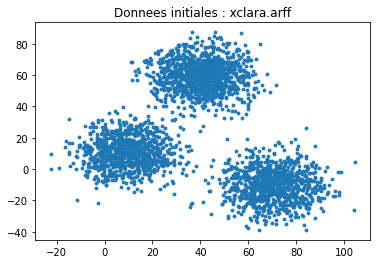

------------------------------------------------------
Appel KMeans pour une valeur de k fixée


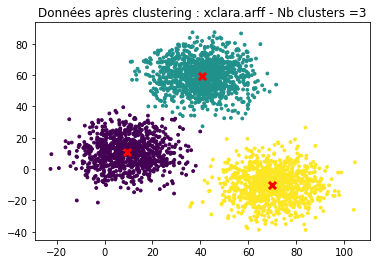

nb clusters = 3 , nb iter = 3 , inertie =  611605.8806933891 , runtime =  16.7 ms
[[ 0.         58.11810068 63.92661838]
 [58.11810068  0.         75.71005186]
 [63.92661838 75.71005186  0.        ]]


In [20]:
 """
Created on 2023/09/11

@author: huguet
"""
import os
os.environ["OMP_NUM_THREADS"] = '4'

import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.io import arff
from sklearn import cluster
from sklearn import metrics

##################################################################
# Exemple :  k-Means Clustering

path = './artificial/'
name="xclara.arff"

#path_out = './fig/'
databrut = arff.loadarff(open(path+str(name), 'r'))
datanp = np.array([[x[0],x[1]] for x in databrut[0]])

# PLOT datanp (en 2D) - / scatter plot
# Extraire chaque valeur de features pour en faire une liste
# EX : 
# - pour t1=t[:,0] --> [1, 3, 5, 7]
# - pour t2=t[:,1] --> [2, 4, 6, 8]
print("---------------------------------------")
print("Affichage données initiales            "+ str(name))
f0 = datanp[:,0] # tous les élements de la première colonne
f1 = datanp[:,1] # tous les éléments de la deuxième colonne

#plt.figure(figsize=(6, 6))
plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales : "+ str(name))
#plt.savefig(path_out+"Plot-kmeans-code1-"+str(name)+"-init.jpg",bbox_inches='tight', pad_inches=0.1)
plt.show()

# Run clustering method for a given number of clusters
print("------------------------------------------------------")
print("Appel KMeans pour une valeur de k fixée")
tps1 = time.time()
k=3
model = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
# informations sur le clustering obtenu
iteration = model.n_iter_
inertie = model.inertia_
centroids = model.cluster_centers_

#plt.figure(figsize=(6, 6))
plt.scatter(f0, f1, c=labels, s=8)
plt.scatter(centroids[:, 0],centroids[:, 1], marker="x", s=50, linewidths=3, color="red")
plt.title("Données après clustering : "+ str(name) + " - Nb clusters ="+ str(k))
#plt.savefig(path_out+"Plot-kmeans-code1-"+str(name)+"-cluster.jpg",bbox_inches='tight', pad_inches=0.1)
plt.show()

print("nb clusters =",k,", nb iter =",iteration, ", inertie = ",inertie, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")
#print("labels", labels)

from sklearn.metrics.pairwise import euclidean_distances
dists = euclidean_distances(centroids)
print(dists)

------------------------------------------------------
Appel KMeans pour une valeur de k =3


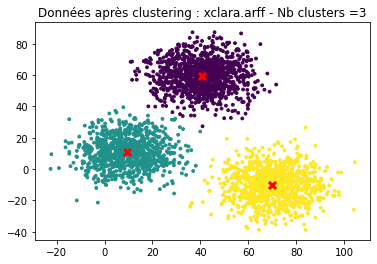

nb clusters = 3 , nb iter = 2 , inertie =  611605.880693389 , runtime =  20.4 ms
[[ 0.         58.11810068 75.71005186]
 [58.11810068  0.         63.92661838]
 [75.71005186 63.92661838  0.        ]]


In [21]:
# Run clustering method for a given number of clusters
print("------------------------------------------------------")
print("Appel KMeans pour une valeur de k =3")
tps1 = time.time()
k=3
model = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
# informations sur le clustering obtenu
iteration = model.n_iter_
inertie = model.inertia_
centroids = model.cluster_centers_

#plt.figure(figsize=(6, 6))
plt.scatter(f0, f1, c=labels, s=8)
plt.scatter(centroids[:, 0],centroids[:, 1], marker="x", s=50, linewidths=3, color="red")
plt.title("Données après clustering : "+ str(name) + " - Nb clusters ="+ str(k))
#plt.savefig(path_out+"Plot-kmeans-code1-"+str(name)+"-cluster.jpg",bbox_inches='tight', pad_inches=0.1)
plt.show()

print("nb clusters =",k,", nb iter =",iteration, ", inertie = ",inertie, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")
#print("labels", labels)

from sklearn.metrics.pairwise import euclidean_distances
dists = euclidean_distances(centroids)
print(dists)

In [22]:
from sklearn.metrics import pairwise_distances
import numpy as np

# Calcul de la distance minimale entre chaque point de données et son centre de cluster
min_distances = np.min(pairwise_distances(datanp, centroids), axis=1)

# Calcul de la distance maximale entre chaque point de données et son centre de cluster
max_distances = np.max(pairwise_distances(datanp, centroids), axis=1)

# Calcul de la distance moyenne entre chaque point de données et son centre de cluster
mean_distances = np.mean(pairwise_distances(datanp, centroids))

print(min_distances)
print(max_distances)
print(mean_distances)

[15.7742349   9.87655463  9.04449993 ...  5.47219431 20.90805072
 15.5959933 ]
[73.8545108  58.08388842 71.01508094 ... 74.13522418 87.65757848
 87.98558269]
48.797534450517794


In [23]:
# Calcul de la distance minimale entre les différents centres de clusters
min_separation = np.min(pairwise_distances(centroids, centroids))

# Calcul de la distance maximale entre les différents centres de clusters
max_separation = np.max(pairwise_distances(centroids, centroids))

# Calcul de la distance moyenne entre les différents centres de clusters
mean_separation = np.mean(pairwise_distances(centroids, centroids))

print(min_separation)
print(max_separation)
print(mean_separation)

0.0
75.71005185791087
43.94550465017213


------------------------------------------------------
Appel KMeans pour une valeur de k  2


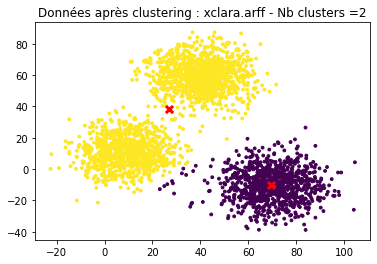

nb clusters = 2 , nb iter = 7 , inertie =  [2309985.3891687873] , runtime =  21.58 ms
[[ 0.         64.51952964]
 [64.51952964  0.        ]]
------------------------------------------------------
Appel KMeans pour une valeur de k  3


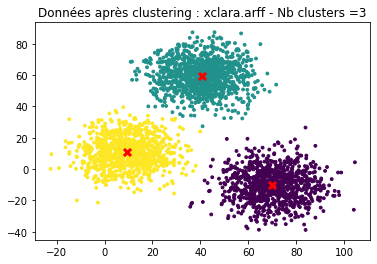

nb clusters = 3 , nb iter = 2 , inertie =  [2309985.3891687873, 611605.880693389] , runtime =  12.51 ms
[[ 0.         75.71005186 63.92661838]
 [75.71005186  0.         58.11810068]
 [63.92661838 58.11810068  0.        ]]
------------------------------------------------------
Appel KMeans pour une valeur de k  4


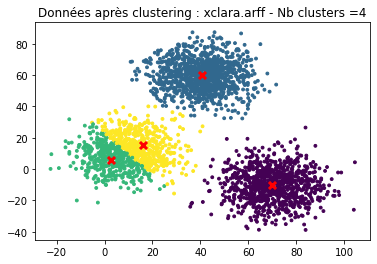

nb clusters = 4 , nb iter = 11 , inertie =  [2309985.3891687873, 611605.880693389, 550367.8543623337] , runtime =  15.86 ms
[[ 0.         75.80371667 69.18049735 59.86826089]
 [75.80371667  0.         66.42489939 50.80981599]
 [69.18049735 66.42489939  0.         16.67379121]
 [59.86826089 50.80981599 16.67379121  0.        ]]
------------------------------------------------------
Appel KMeans pour une valeur de k  5


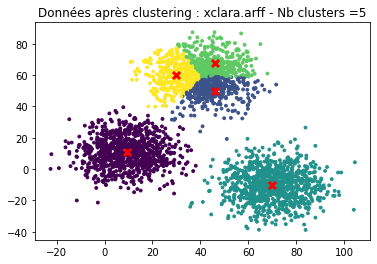

nb clusters = 5 , nb iter = 13 , inertie =  [2309985.3891687873, 611605.880693389, 550367.8543623337, 484719.5792175791] , runtime =  34.45 ms
[[ 0.         53.74367038 64.02137144 67.93924875 53.38306781]
 [53.74367038  0.         64.85397166 17.77090622 18.92205621]
 [64.02137144 64.85397166  0.         81.58491968 80.82064671]
 [67.93924875 17.77090622 81.58491968  0.         18.06591983]
 [53.38306781 18.92205621 80.82064671 18.06591983  0.        ]]
------------------------------------------------------
Appel KMeans pour une valeur de k  6


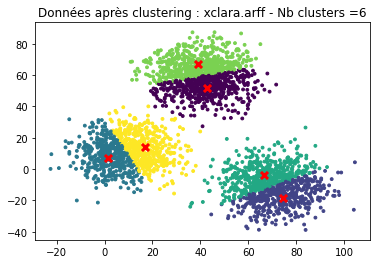

nb clusters = 6 , nb iter = 9 , inertie =  [2309985.3891687873, 611605.880693389, 550367.8543623337, 484719.5792175791, 414395.8196419285] , runtime =  52.45 ms
[[ 0.         76.61343299 60.62662818 60.00693457 15.67764964 45.96428252]
 [76.61343299  0.         76.92862852 16.6588652  92.12473842 65.77000529]
 [60.62662818 76.92862852  0.         65.61707821 70.2348238  16.53153123]
 [60.00693457 16.6588652  65.61707821  0.         75.56197071 52.51936621]
 [15.67764964 92.12473842 70.2348238  75.56197071  0.         57.38848583]
 [45.96428252 65.77000529 16.53153123 52.51936621 57.38848583  0.        ]]
------------------------------------------------------
Appel KMeans pour une valeur de k  7


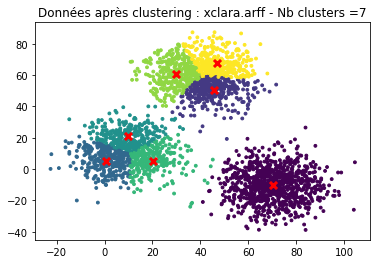

nb clusters = 7 , nb iter = 21 , inertie =  [2309985.3891687873, 611605.880693389, 550367.8543623337, 484719.5792175791, 414395.8196419285, 383198.80044572696] , runtime =  57.94 ms
[[ 0.         65.17139501 71.06055263 68.02206523 52.20382511 81.57830978
  81.17727679]
 [65.17139501  0.         63.42371945 46.23605618 51.29650878 18.86004123
  17.44784079]
 [71.06055263 63.42371945  0.         18.08782527 19.57139844 62.79245236
  77.486498  ]
 [68.02206523 46.23605618 18.08782527  0.         18.81295868 44.71679101
  59.57210022]
 [52.20382511 51.29650878 19.57139844 18.81295868  0.         56.17297641
  67.48872362]
 [81.57830978 18.86004123 62.79245236 44.71679101 56.17297641  0.
  18.12827342]
 [81.17727679 17.44784079 77.486498   59.57210022 67.48872362 18.12827342
   0.        ]]


In [24]:
k_valeurs = range(2, 8)
inertie = []

for k in k_valeurs : 
    print("------------------------------------------------------")
    print("Appel KMeans pour une valeur de k ", k)
    tps1 = time.time()
    model = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    # informations sur le clustering obtenu
    iteration = model.n_iter_
    inertie.append(model.inertia_)
    centroids = model.cluster_centers_
    #plt.figure(figsize=(6, 6))
    plt.scatter(f0, f1, c=labels, s=8)
    plt.scatter(centroids[:, 0],centroids[:, 1], marker="x", s=50, linewidths=3, color="red")
    plt.title("Données après clustering : "+ str(name) + " - Nb clusters ="+ str(k))
    #plt.savefig(path_out+"Plot-kmeans-code1-"+str(name)+"-cluster.jpg",bbox_inches='tight', pad_inches=0.1)
    plt.show()

    print("nb clusters =",k,", nb iter =",iteration, ", inertie = ",inertie, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")
    #print("labels", labels)

    from sklearn.metrics.pairwise import euclidean_distances
    dists = euclidean_distances(centroids)
    print(dists)

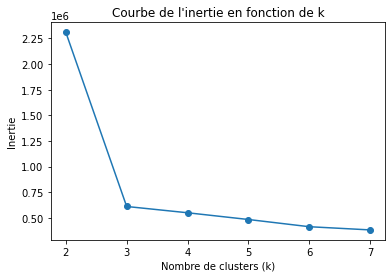

In [25]:
plt.plot(k_valeurs, inertie, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.title("Courbe de l'inertie en fonction de k")
plt.show()

###### Remarque
Inertie : L'inertie est une mesure couramment utilisée pour évaluer la qualité d'une solution de clustering. Elle mesure la dispersion des points de données à l'intérieur de chaque cluster. On observe la bonne solution au niveau de la cassure de la courbe d'inertie en fonction de k. 

Score de regroupement et de séparation : voir partie 2.1

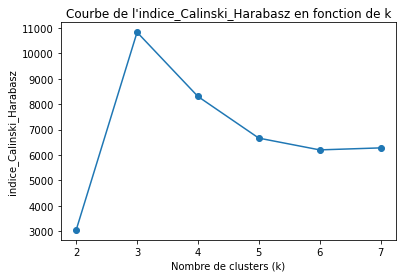

1697185186.447943 1697185186.571112
123.1689453125


In [35]:
k_valeurs = range(2, 8)
inertie = []
indice_Calinski_Harabasz = []

tps1 = time.time()
for k in k_valeurs : 
    #print("------------------------------------------------------")
    #print("Appel KMeans pour une valeur de k ", k)
    
    model = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
    model.fit(datanp)
    
    labels = model.labels_
    indice_Calinski_Harabasz.append(metrics.calinski_harabasz_score(datanp, labels))
    
    
tps2 = time.time()
runtime=(tps2 - tps1)*1000
plt.plot(k_valeurs, indice_Calinski_Harabasz, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("indice_Calinski_Harabasz")
plt.title("Courbe de l'indice_Calinski_Harabasz en fonction de k")
plt.show()
print(tps1, tps2)
print(runtime)


D'après la courbe et à l'aide de l'indice Calinski Harabsz, la solution obtenue est k = 3. C'est celui qui a l'indice le plus elevé. 

Le temps de calcul : 123.1689 ms

Le score de regroupement et séparation : voir partie 2.1

---------------------------------------
Affichage données initiales            disk-4000n.arff


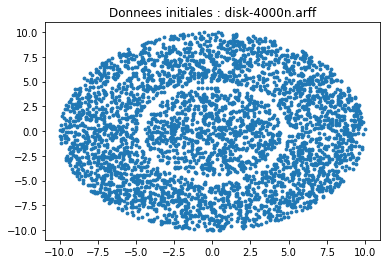

---------------------------------------
Affichage données initiales            disk-5000n.arff


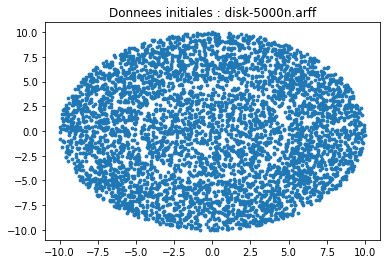

---------------------------------------
Affichage données initiales            zelnik4.arff


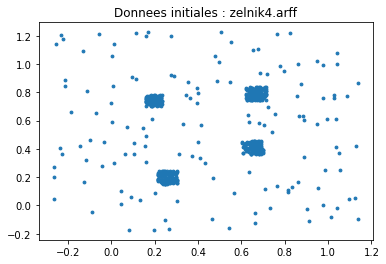

---------------------------------------
Affichage données initiales            chainlink.arff


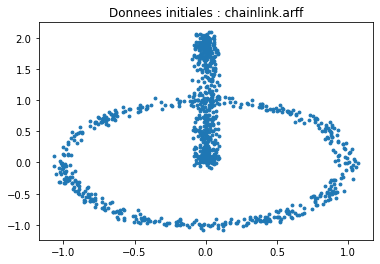

---------------------------------------
Affichage données initiales            st900.arff


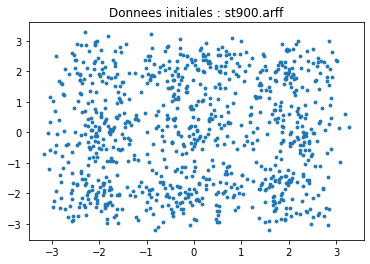

---------------------------------------
Affichage données initiales            square3.arff


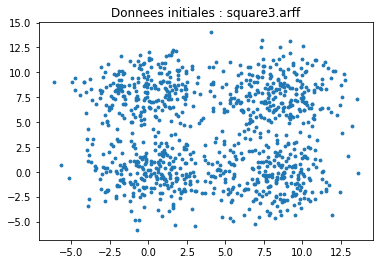

---------------------------------------
Affichage données initiales            sizes5.arff


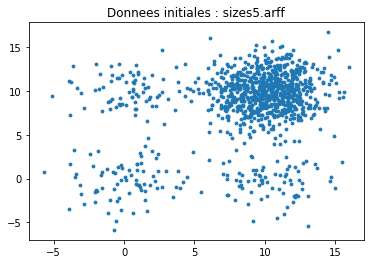

---------------------------------------
Affichage données initiales            s-set1.arff


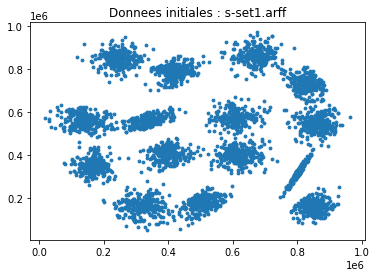

---------------------------------------
Affichage données initiales            spiral.arff


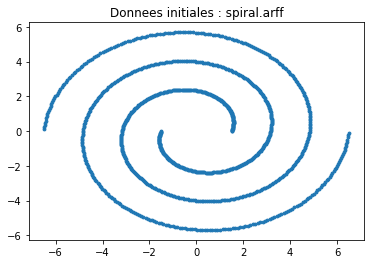

---------------------------------------
Affichage données initiales            2d-4c-no9.arff


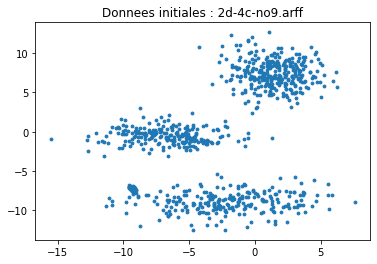

---------------------------------------
Affichage données initiales            convexe_identifie.arff


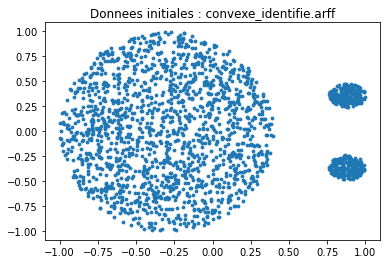

---------------------------------------
Affichage données initiales            dpb.arff


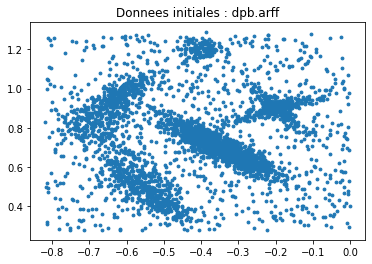

---------------------------------------
Affichage données initiales            tetra.arff


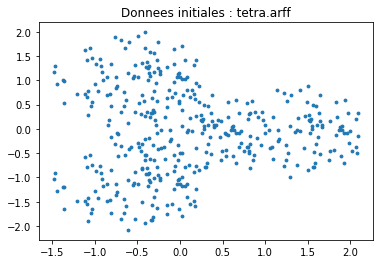

---------------------------------------
Affichage données initiales            DS577.arff


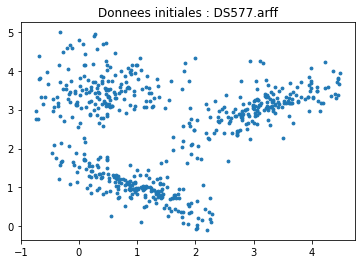

---------------------------------------
Affichage données initiales            dpc.arff


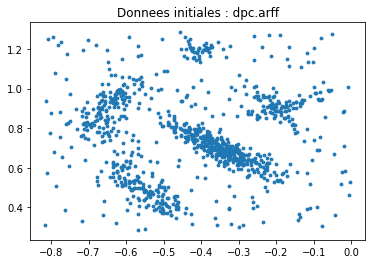

---------------------------------------
Affichage données initiales            ds4c2sc8.arff


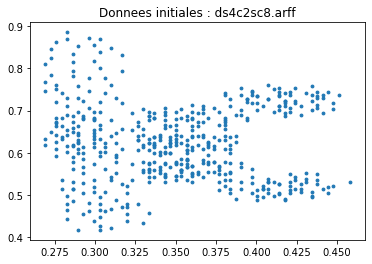

---------------------------------------
Affichage données initiales            convexe_mal_separe.arff


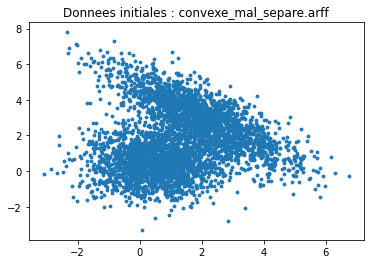

---------------------------------------
Affichage données initiales            spiralsquare.arff


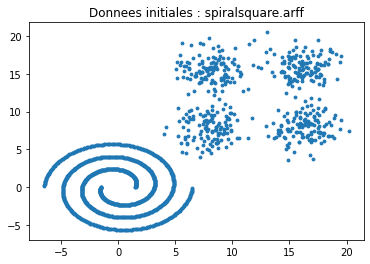

---------------------------------------
Affichage données initiales            rings.arff


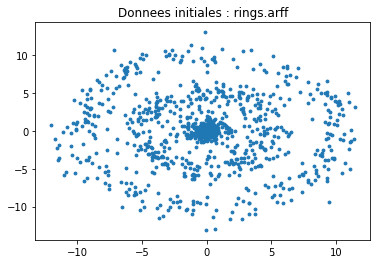

---------------------------------------
Affichage données initiales            pathbased.arff


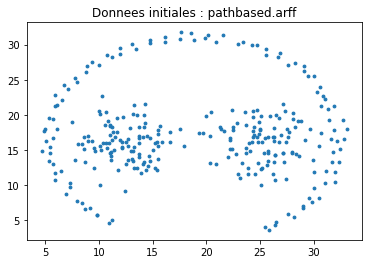

---------------------------------------
Affichage données initiales            shapes.arff


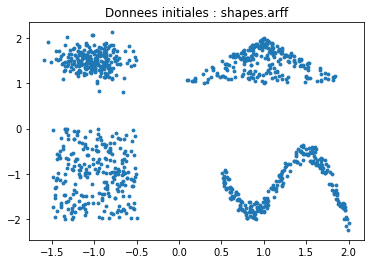

---------------------------------------
Affichage données initiales            densite_variable.arff


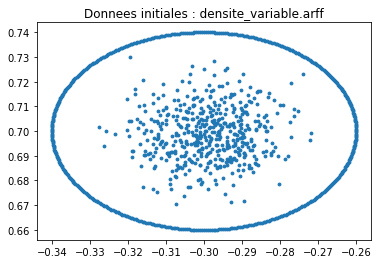

---------------------------------------
Affichage données initiales            diamond.arff


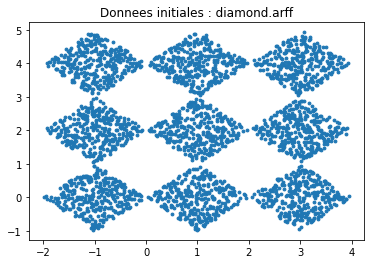

---------------------------------------
Affichage données initiales            cure-t1-2000n-2D.arff


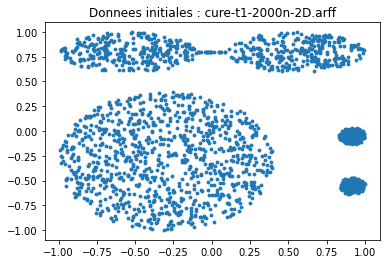

---------------------------------------
Affichage données initiales            sizes4.arff


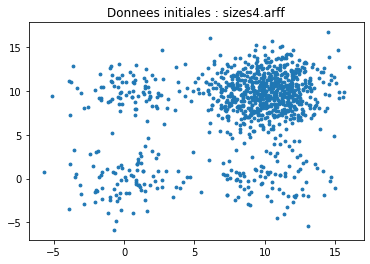

---------------------------------------
Affichage données initiales            square2.arff


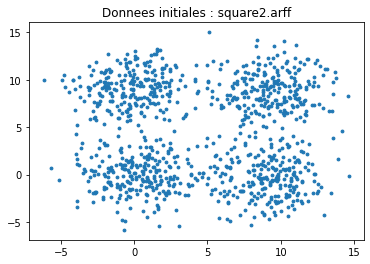

---------------------------------------
Affichage données initiales            dartboard1.arff


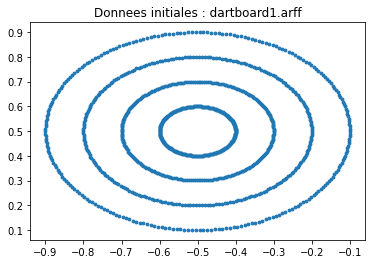

---------------------------------------
Affichage données initiales            2d-4c-no4.arff


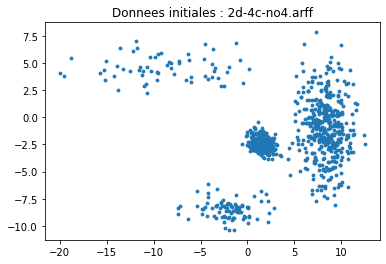

---------------------------------------
Affichage données initiales            zelnik5.arff


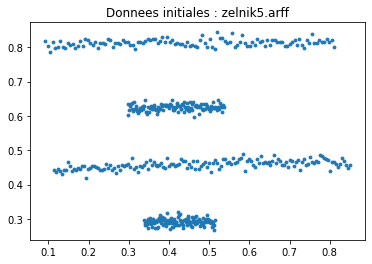

---------------------------------------
Affichage données initiales            bruite_convexe.arff


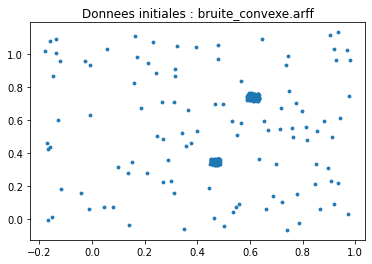

---------------------------------------
Affichage données initiales            atom.arff


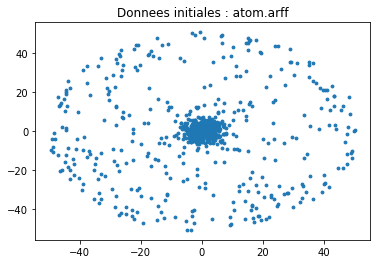

---------------------------------------
Affichage données initiales            rectangles.arff


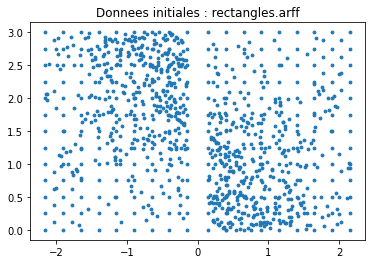

---------------------------------------
Affichage données initiales            smile2.arff


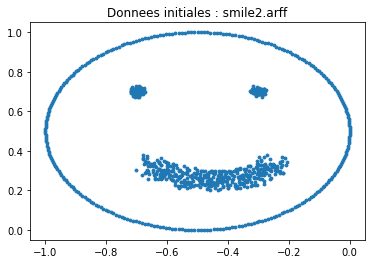

---------------------------------------
Affichage données initiales            cluto-t5-8k.arff


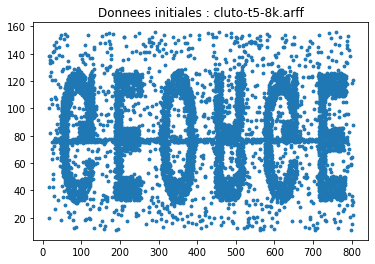

---------------------------------------
Affichage données initiales            convexe_bien_separe.arff


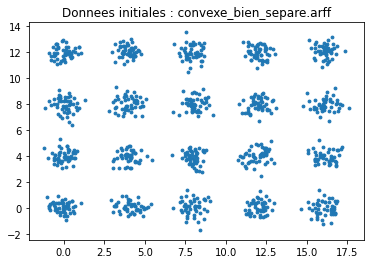

---------------------------------------
Affichage données initiales            zelnik2.arff


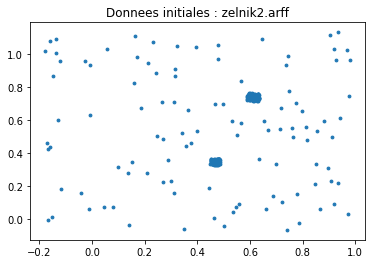

---------------------------------------
Affichage données initiales            long2.arff


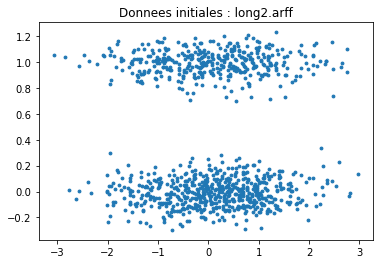

---------------------------------------
Affichage données initiales            square5.arff


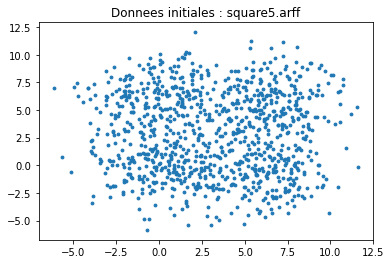

---------------------------------------
Affichage données initiales            triangle1.arff


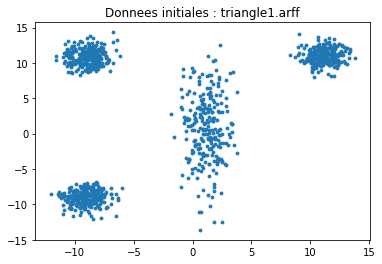

---------------------------------------
Affichage données initiales            sizes3.arff


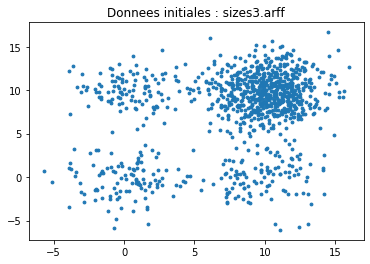

---------------------------------------
Affichage données initiales            donut1.arff


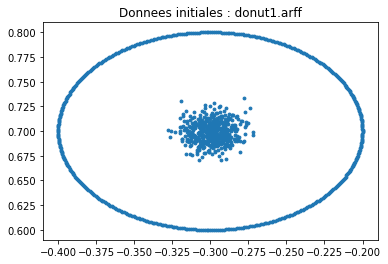

---------------------------------------
Affichage données initiales            R15.arff


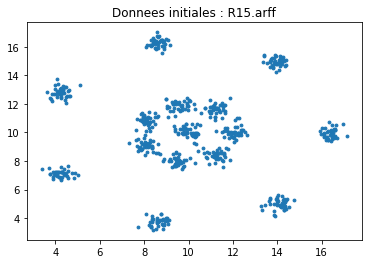

---------------------------------------
Affichage données initiales            birch-rg1.arff


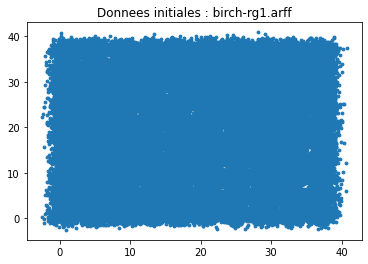

---------------------------------------
Affichage données initiales            2d-4c.arff


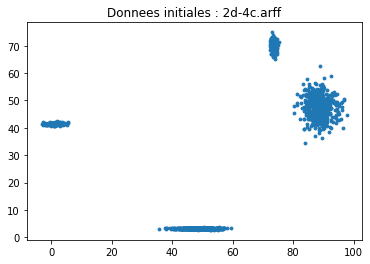

---------------------------------------
Affichage données initiales            cuboids.arff


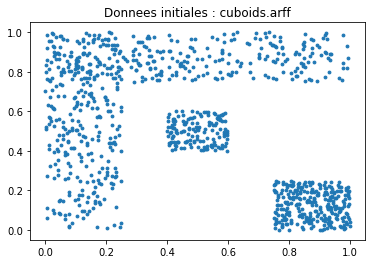

---------------------------------------
Affichage données initiales            longsquare.arff


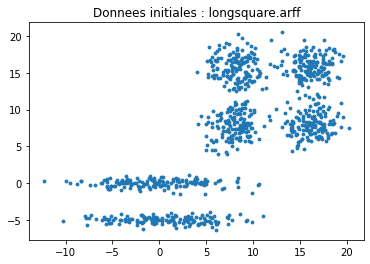

---------------------------------------
Affichage données initiales            curves2.arff


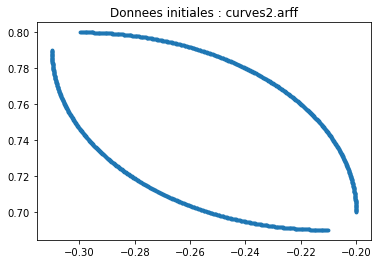

---------------------------------------
Affichage données initiales            spherical_4_3.arff


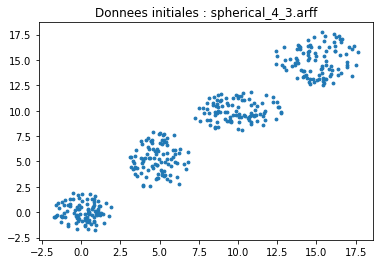

---------------------------------------
Affichage données initiales            disk-3000n.arff


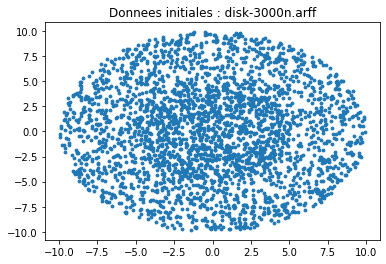

---------------------------------------
Affichage données initiales            twenty.arff


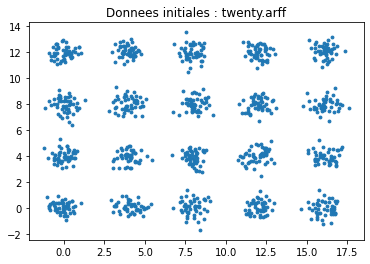

---------------------------------------
Affichage données initiales            sizes2.arff


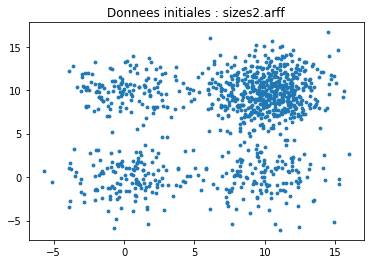

---------------------------------------
Affichage données initiales            square4.arff


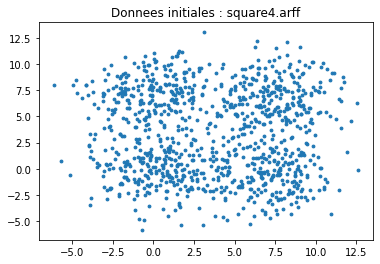

---------------------------------------
Affichage données initiales            golfball.arff


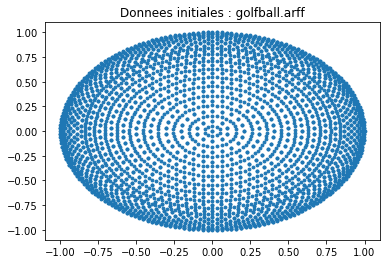

---------------------------------------
Affichage données initiales            spherical_6_2.arff


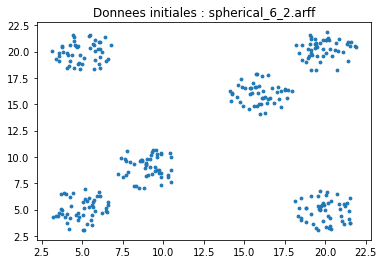

---------------------------------------
Affichage données initiales            long3.arff


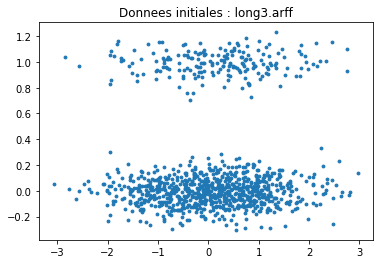

---------------------------------------
Affichage données initiales            zelnik3.arff


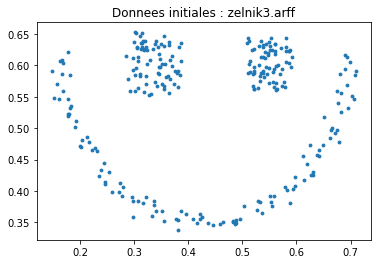

---------------------------------------
Affichage données initiales            jain.arff


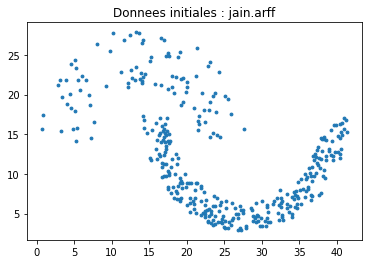

---------------------------------------
Affichage données initiales            flame.arff


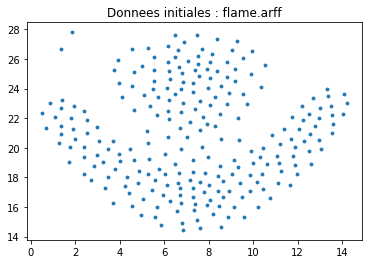

---------------------------------------
Affichage données initiales            simplex.arff


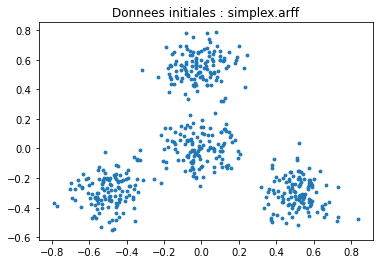

---------------------------------------
Affichage données initiales            smile3.arff


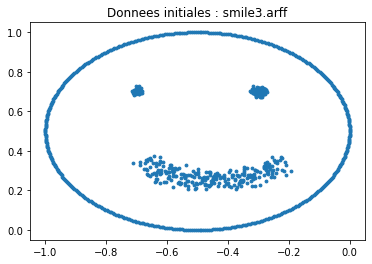

---------------------------------------
Affichage données initiales            bruit.arff


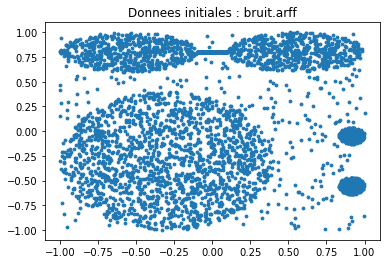

---------------------------------------
Affichage données initiales            cluto-t4-8k.arff


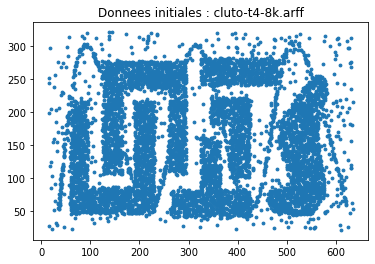

---------------------------------------
Affichage données initiales            compound.arff


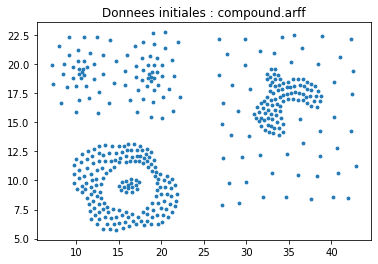

---------------------------------------
Affichage données initiales            dense-disk-5000.arff


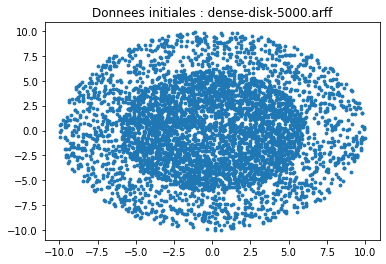

---------------------------------------
Affichage données initiales            insect.arff


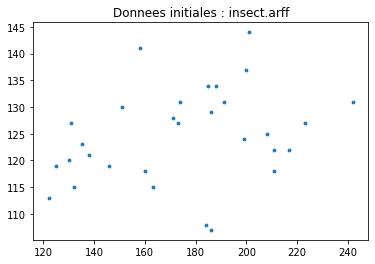

---------------------------------------
Affichage données initiales            cure-t2-4k.arff


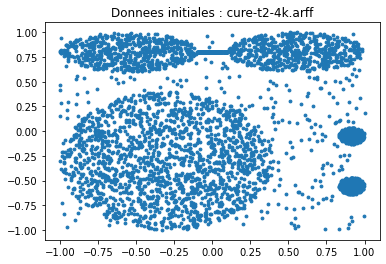

---------------------------------------
Affichage données initiales            aggregation.arff


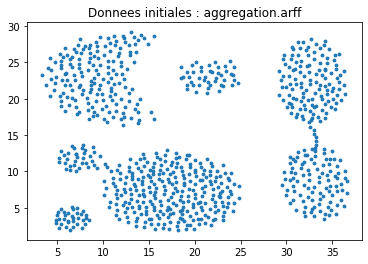

---------------------------------------
Affichage données initiales            complex8.arff


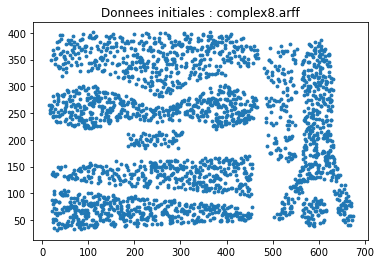

---------------------------------------
Affichage données initiales            carre.arff


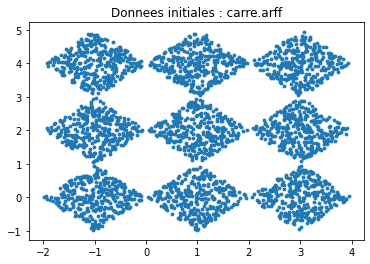

---------------------------------------
Affichage données initiales            curves1.arff


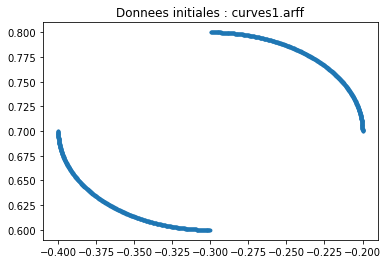

---------------------------------------
Affichage données initiales            impossible.arff


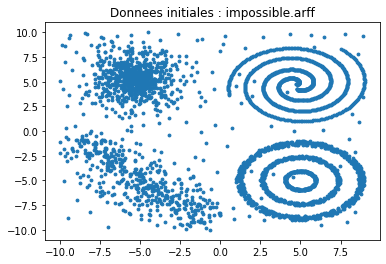

---------------------------------------
Affichage données initiales            cluto-t8-8k.arff


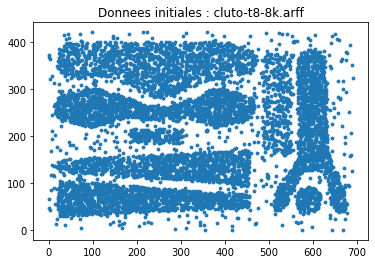

---------------------------------------
Affichage données initiales            birch-rg3.arff


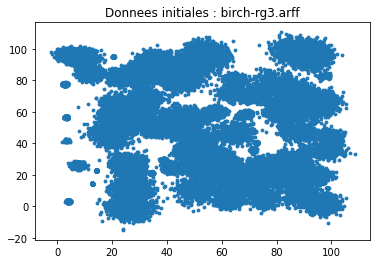

---------------------------------------
Affichage données initiales            donut3.arff


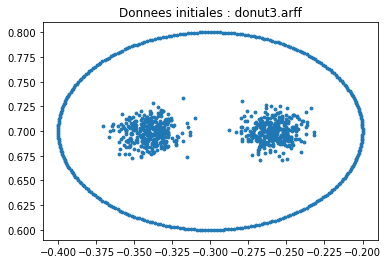

---------------------------------------
Affichage données initiales            banana.arff


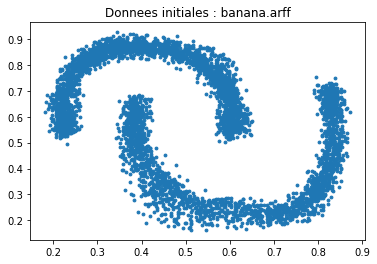

---------------------------------------
Affichage données initiales            twodiamonds.arff


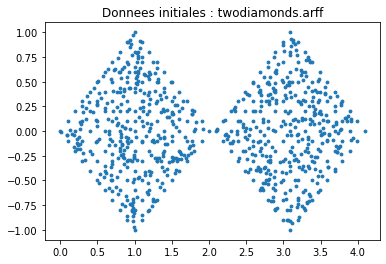

---------------------------------------
Affichage données initiales            sizes1.arff


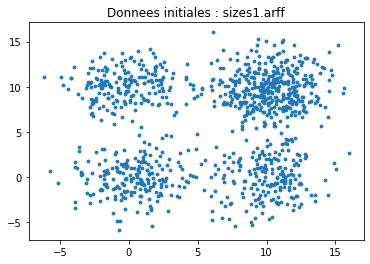

---------------------------------------
Affichage données initiales            target.arff


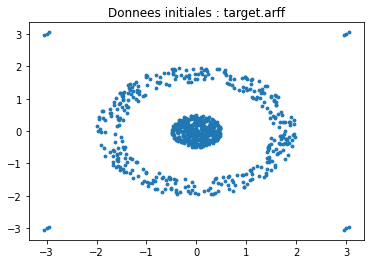

---------------------------------------
Affichage données initiales            wingnut.arff


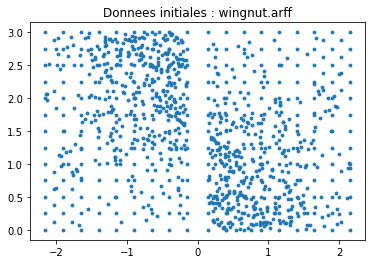

---------------------------------------
Affichage données initiales            zelnik1.arff


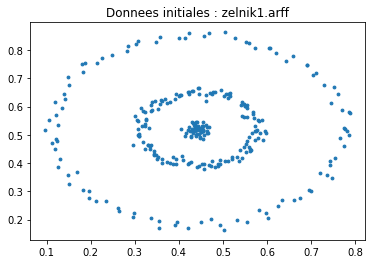

---------------------------------------
Affichage données initiales            long1.arff


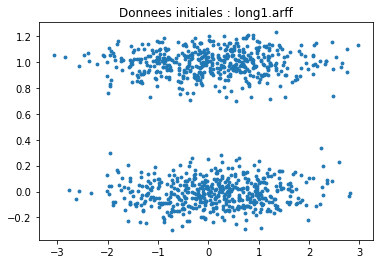

---------------------------------------
Affichage données initiales            xclara.arff


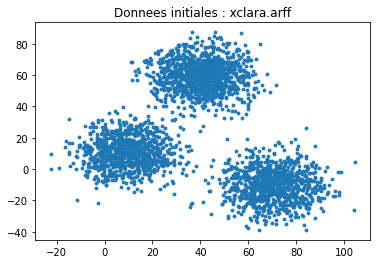

---------------------------------------
Affichage données initiales            diamond9.arff


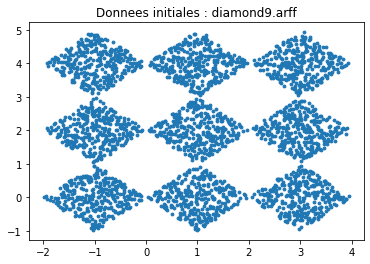

---------------------------------------
Affichage données initiales            elliptical_10_2.arff


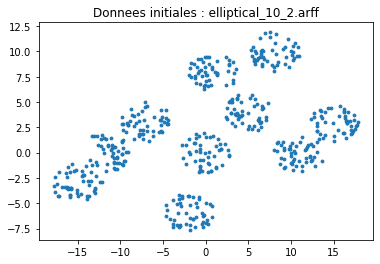

---------------------------------------
Affichage données initiales            triangle2.arff


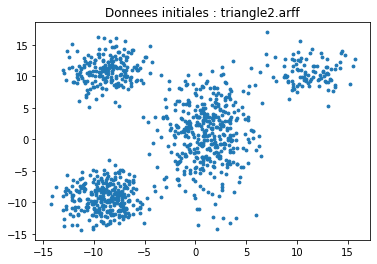

---------------------------------------
Affichage données initiales            ds3c3sc6.arff


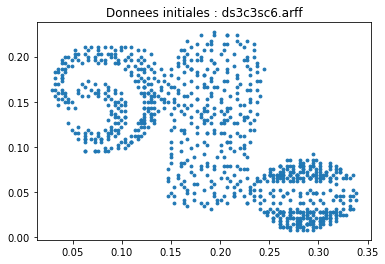

---------------------------------------
Affichage données initiales            donut2.arff


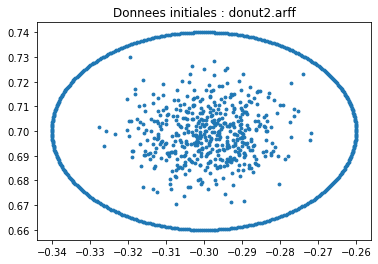

---------------------------------------
Affichage données initiales            s-set4.arff


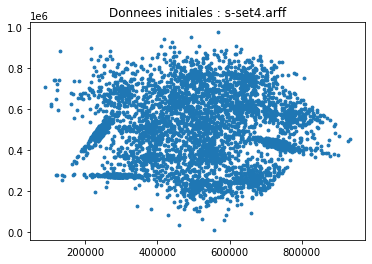

---------------------------------------
Affichage données initiales            birch-rg2.arff


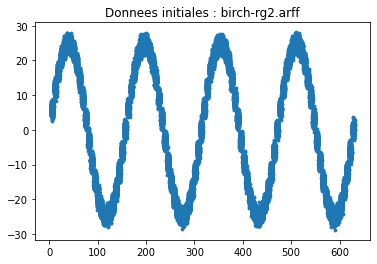

---------------------------------------
Affichage données initiales            ds2c2sc13.arff


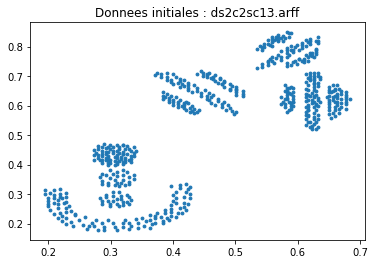

---------------------------------------
Affichage données initiales            pmf.arff


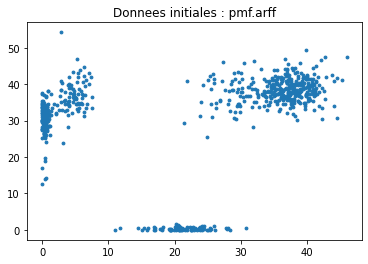

---------------------------------------
Affichage données initiales            disk-4600n.arff


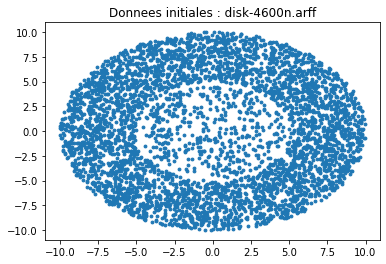

---------------------------------------
Affichage données initiales            losange.arff


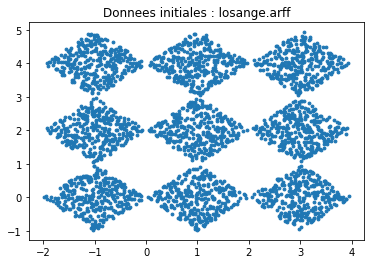

---------------------------------------
Affichage données initiales            disk-6000n.arff


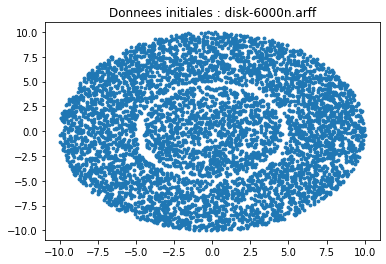

---------------------------------------
Affichage données initiales            elly-2d10c13s.arff


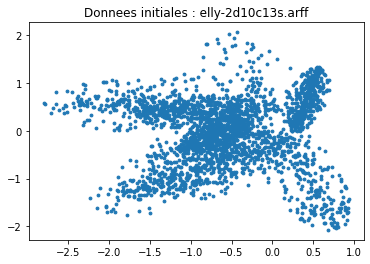

---------------------------------------
Affichage données initiales            complex9.arff


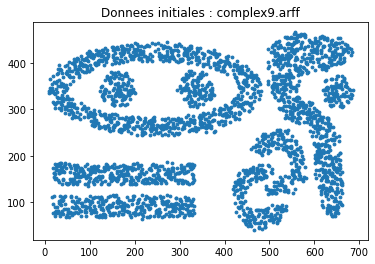

---------------------------------------
Affichage données initiales            smile1.arff


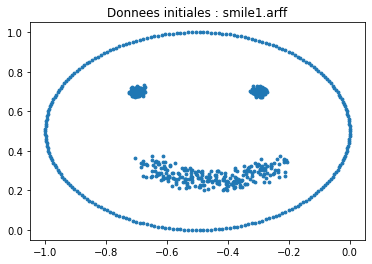

---------------------------------------
Affichage données initiales            non_convexe.arff


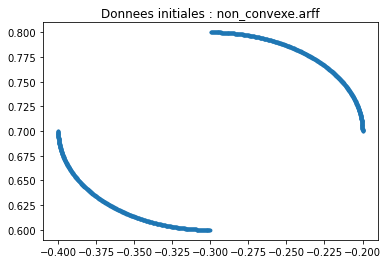

---------------------------------------
Affichage données initiales            fourty.arff


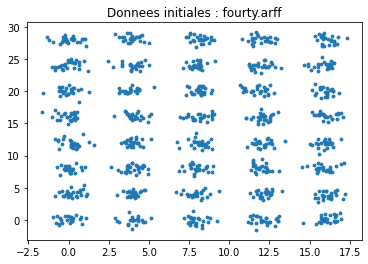

---------------------------------------
Affichage données initiales            cluto-t7-10k.arff


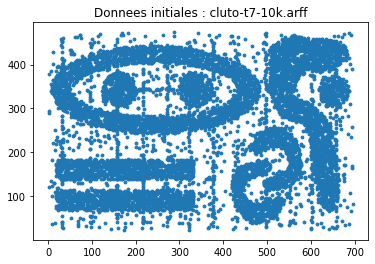

---------------------------------------
Affichage données initiales            spherical_5_2.arff


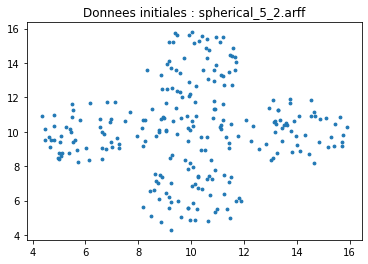

---------------------------------------
Affichage données initiales            s-set3.arff


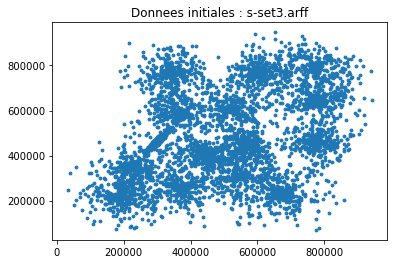

---------------------------------------
Affichage données initiales            dartboard2.arff


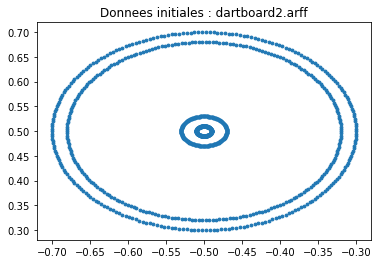

---------------------------------------
Affichage données initiales            square1.arff


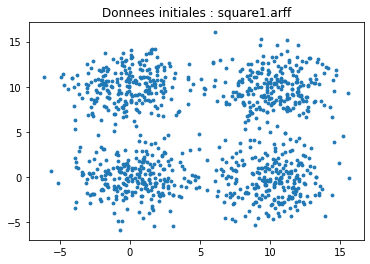

---------------------------------------
Affichage données initiales            2d-3c-no123.arff


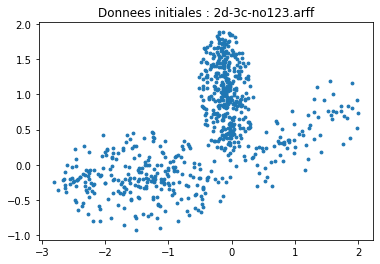

---------------------------------------
Affichage données initiales            threenorm.arff


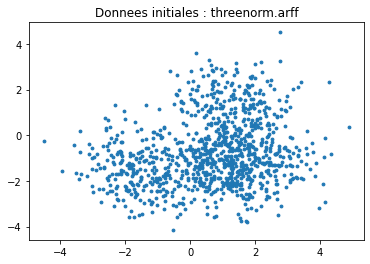

---------------------------------------
Affichage données initiales            hypercube.arff


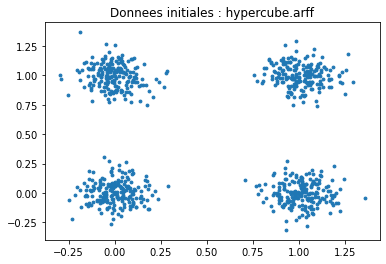

---------------------------------------
Affichage données initiales            zelnik6.arff


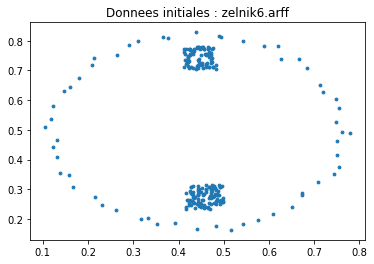

---------------------------------------
Affichage données initiales            circle.arff


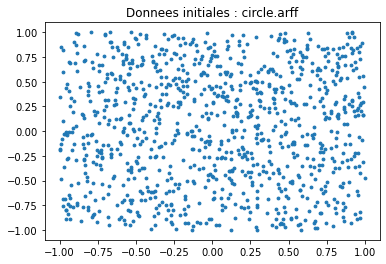

---------------------------------------
Affichage données initiales            gaussians1.arff


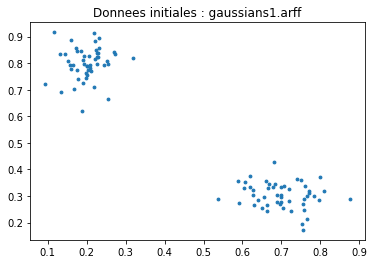

---------------------------------------
Affichage données initiales            disk-1000n.arff


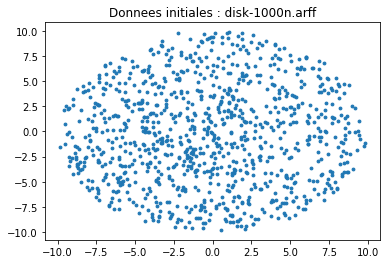

---------------------------------------
Affichage données initiales            engytime.arff


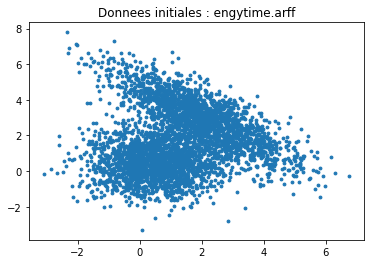

---------------------------------------
Affichage données initiales            dense-disk-3000.arff


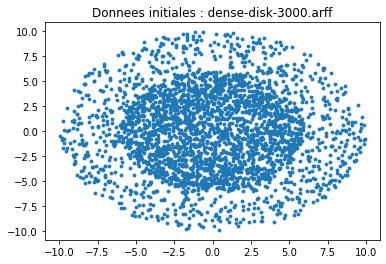

---------------------------------------
Affichage données initiales            cure-t0-2000n-2D.arff


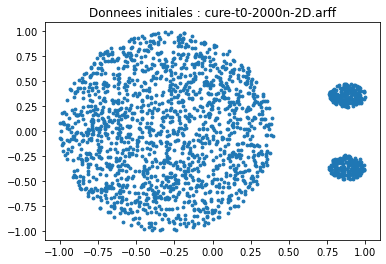

---------------------------------------
Affichage données initiales            blobs.arff


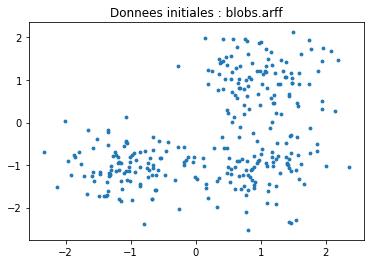

---------------------------------------
Affichage données initiales            mopsi-finland.arff


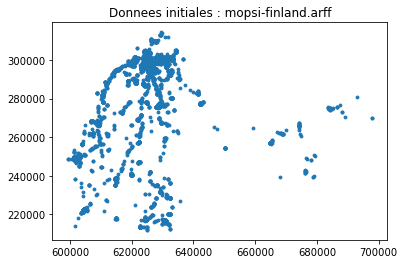

---------------------------------------
Affichage données initiales            hepta.arff


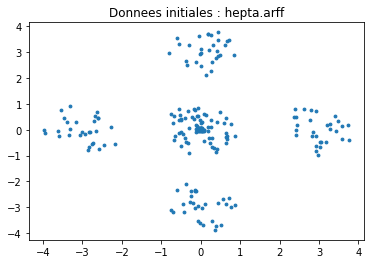

---------------------------------------
Affichage données initiales            D31.arff


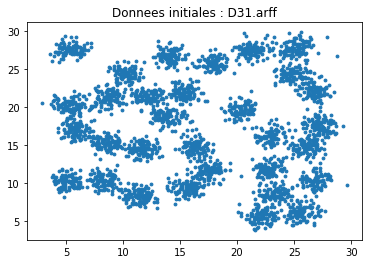

---------------------------------------
Affichage données initiales            donutcurves.arff


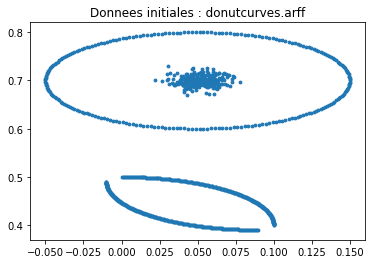

---------------------------------------
Affichage données initiales            xor.arff


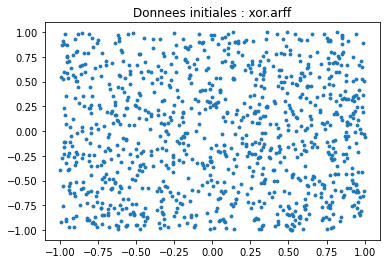

---------------------------------------
Affichage données initiales            aml28.arff


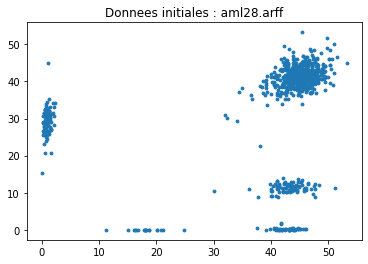

---------------------------------------
Affichage données initiales            3MC.arff


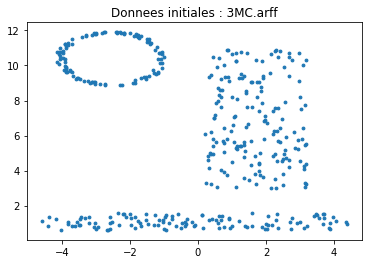

---------------------------------------
Affichage données initiales            2dnormals.arff


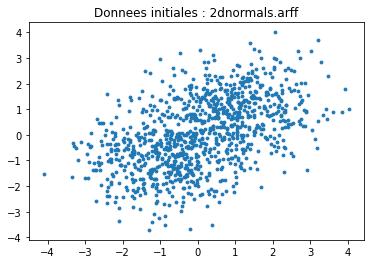

---------------------------------------
Affichage données initiales            DS850.arff


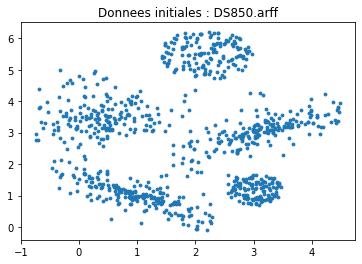

---------------------------------------
Affichage données initiales            cassini.arff


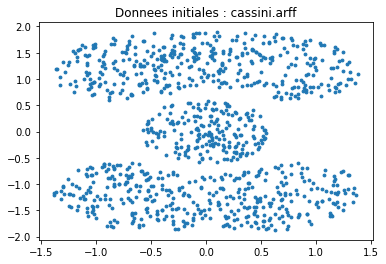

---------------------------------------
Affichage données initiales            2d-20c-no0.arff


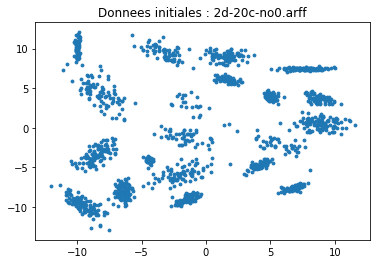

---------------------------------------
Affichage données initiales            mopsi-joensuu.arff


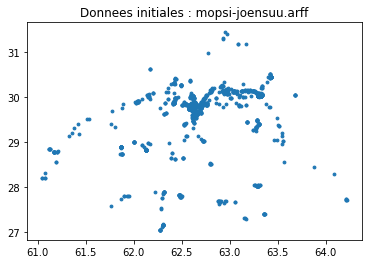

---------------------------------------
Affichage données initiales            2sp2glob.arff


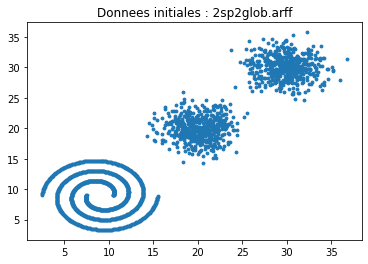

---------------------------------------
Affichage données initiales            elly.arff


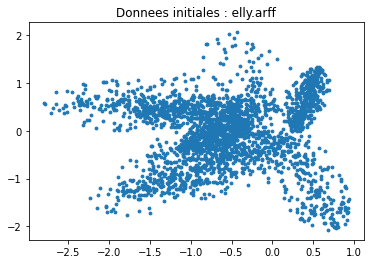

---------------------------------------
Affichage données initiales            s-set2.arff


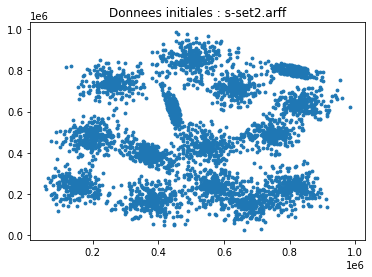

---------------------------------------
Affichage données initiales            disk-4500n.arff


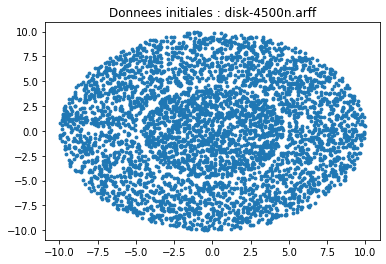

---------------------------------------
Affichage données initiales            3-spiral.arff


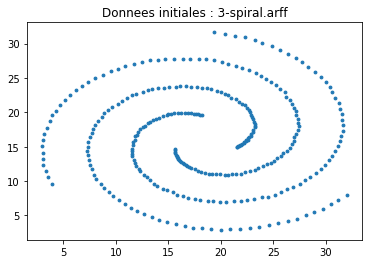

---------------------------------------
Affichage données initiales            lsun.arff


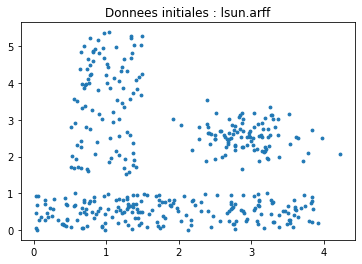

In [37]:

path = './artificial/'

file_list = os.listdir(path)

for name in file_list:
    if name.endswith('.arff'):
        #path_out = './fig/'
        databrut = arff.loadarff(open(path+str(name), 'r'))
        datanp = np.array([[x[0],x[1]] for x in databrut[0]])

        # PLOT datanp (en 2D) - / scatter plot
        # Extraire chaque valeur de features pour en faire une liste
        # EX : 
        # - pour t1=t[:,0] --> [1, 3, 5, 7]
        # - pour t2=t[:,1] --> [2, 4, 6, 8]
        print("---------------------------------------")
        print("Affichage données initiales            "+ str(name))
        f0 = datanp[:,0] # tous les élements de la première colonne
        f1 = datanp[:,1] # tous les éléments de la deuxième colonne

        #plt.figure(figsize=(6, 6))
        plt.scatter(f0, f1, s=8)
        plt.title("Donnees initiales : "+ str(name))
        #plt.savefig(path_out+"Plot-kmeans-code1-"+str(name)+"-init.jpg",bbox_inches='tight', pad_inches=0.1)
        plt.show()



## Les bons dataset pour clustering 


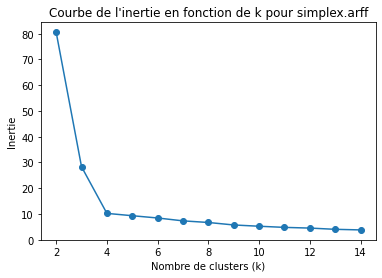

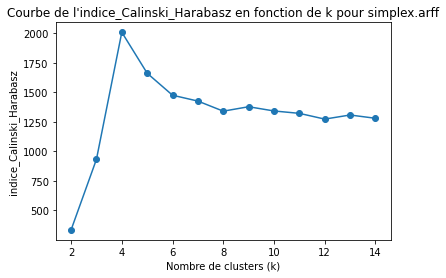

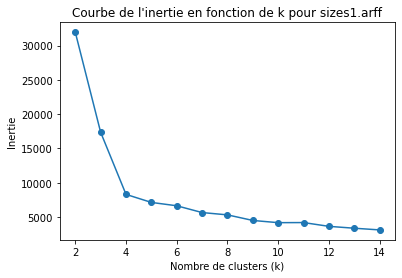

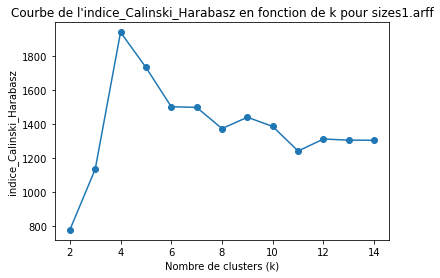

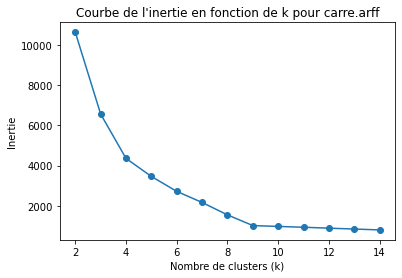

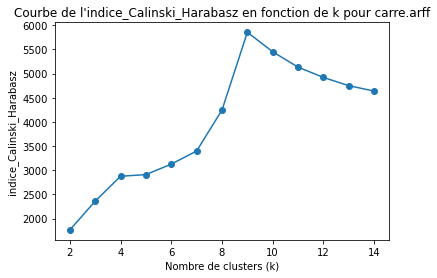

In [53]:
path = './artificial/'
name = ["simplex.arff", "sizes1.arff", "carre.arff"]

for n in name : 
    #path_out = './fig/'
    databrut = arff.loadarff(open(path+str(n), 'r'))
    datanp = np.array([[x[0],x[1]] for x in databrut[0]])

    k_valeurs = range(2, 15)
    inertie = []
    indice_Calinski_Harabasz = []
    for k in k_valeurs : 
        #print("------------------------------------------------------")
        #print("Appel KMeans pour une valeur de k ", k)
        tps1 = time.time()
        model = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
        model.fit(datanp)
        tps2 = time.time()
        labels = model.labels_
        # informations sur le clustering obtenu
        iteration = model.n_iter_
        inertie.append(model.inertia_)
        centroids = model.cluster_centers_
        indice_Calinski_Harabasz.append(metrics.calinski_harabasz_score(datanp, labels))

    plt.plot(k_valeurs, inertie, marker='o')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("Inertie")
    plt.title("Courbe de l'inertie en fonction de k pour " + n)
    plt.show()

    plt.plot(k_valeurs, indice_Calinski_Harabasz, marker='o')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("indice_Calinski_Harabasz")
    plt.title("Courbe de l'indice_Calinski_Harabasz en fonction de k pour " + n)
    plt.show()


## Les mauvais dataset pour clustering 

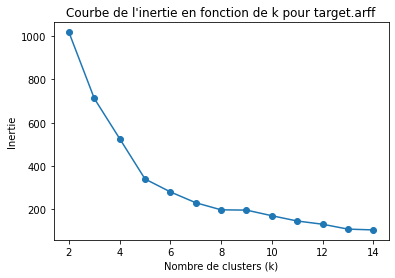

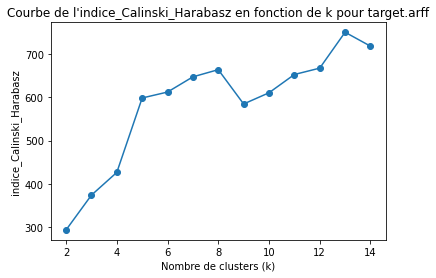

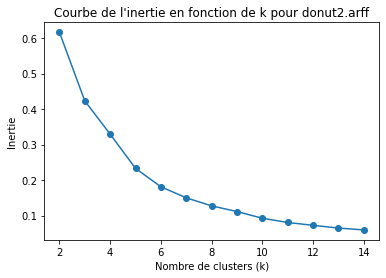

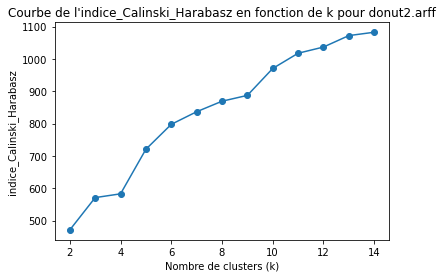

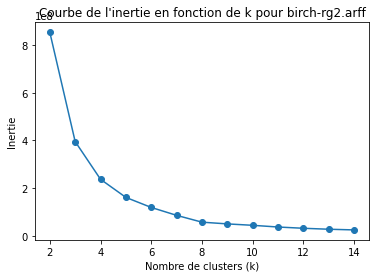

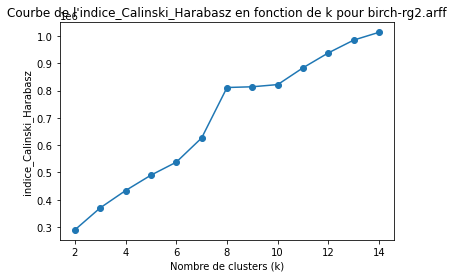

In [54]:
path = './artificial/'
name = ["target.arff", "donut2.arff", "birch-rg2.arff"]

for n in name : 
    #path_out = './fig/'
    databrut = arff.loadarff(open(path+str(n), 'r'))
    datanp = np.array([[x[0],x[1]] for x in databrut[0]])

    k_valeurs = range(2, 15)
    inertie = []
    indice_Calinski_Harabasz = []
    for k in k_valeurs : 
        #print("------------------------------------------------------")
        #print("Appel KMeans pour une valeur de k ", k)
        tps1 = time.time()
        model = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
        model.fit(datanp)
        tps2 = time.time()
        labels = model.labels_
        # informations sur le clustering obtenu
        iteration = model.n_iter_
        inertie.append(model.inertia_)
        centroids = model.cluster_centers_
        indice_Calinski_Harabasz.append(metrics.calinski_harabasz_score(datanp, labels))

    plt.plot(k_valeurs, inertie, marker='o')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("Inertie")
    plt.title("Courbe de l'inertie en fonction de k pour " + n)
    plt.show()

    plt.plot(k_valeurs, indice_Calinski_Harabasz, marker='o')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("indice_Calinski_Harabasz")
    plt.title("Courbe de l'indice_Calinski_Harabasz en fonction de k pour " + n)
    plt.show()

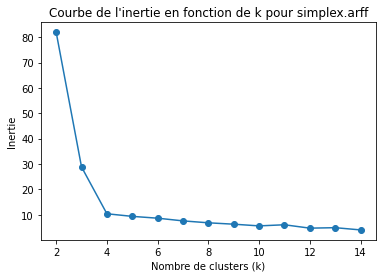

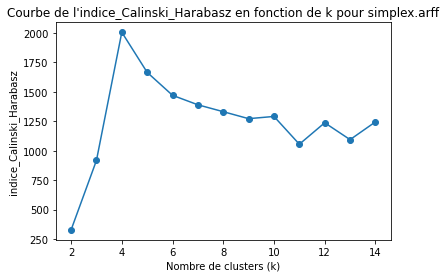

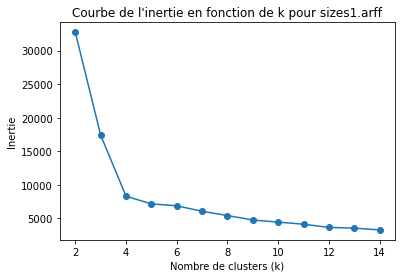

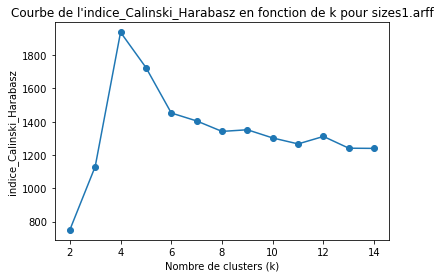

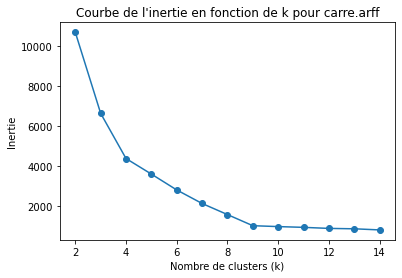

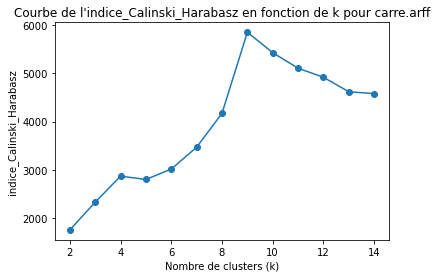

In [60]:
path = './artificial/'
name = ["simplex.arff", "sizes1.arff", "carre.arff"]

for n in name : 
    #path_out = './fig/'
    databrut = arff.loadarff(open(path+str(n), 'r'))
    datanp = np.array([[x[0],x[1]] for x in databrut[0]])

    k_valeurs = range(2, 15)
    inertie = []
    indice_Calinski_Harabasz = []
    for k in k_valeurs : 
        #print("------------------------------------------------------")
        #print("Appel KMeans pour une valeur de k ", k)
        tps1 = time.time()
        model = cluster.MiniBatchKMeans(n_clusters=k, init='k-means++', batch_size=100, n_init=1)
        #model = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
        model.fit(datanp)
        tps2 = time.time()
        labels = model.labels_
        # informations sur le clustering obtenu
        iteration = model.n_iter_
        inertie.append(model.inertia_)
        centroids = model.cluster_centers_
        indice_Calinski_Harabasz.append(metrics.calinski_harabasz_score(datanp, labels))

    plt.plot(k_valeurs, inertie, marker='o')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("Inertie")
    plt.title("Courbe de l'inertie en fonction de k pour " + n)
    plt.show()

    plt.plot(k_valeurs, indice_Calinski_Harabasz, marker='o')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("indice_Calinski_Harabasz")
    plt.title("Courbe de l'indice_Calinski_Harabasz en fonction de k pour " + n)
    plt.show()

## Remarque

1- Modifier le batch size et voir la diff 
2- Superposer les graphes (kmeans + miniBatch )

